In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from wordcloud import WordCloud

In [16]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')
df.head(5)
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [17]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:", conf_matrix)

Accuracy: 0.9838565022421525
Confusion Matrix: [[963   2]
 [ 16 134]]


Top 10 Important Features:
     Feature  Log Probability
7679     you        -3.643075
6906      to        -3.812729
6786     the        -4.169066
955      and        -4.457498
3637      in        -4.471083
4390      me        -4.516157
4646      my        -4.580165
3739      is        -4.593817
3750      it        -4.652189
6781    that        -4.891862


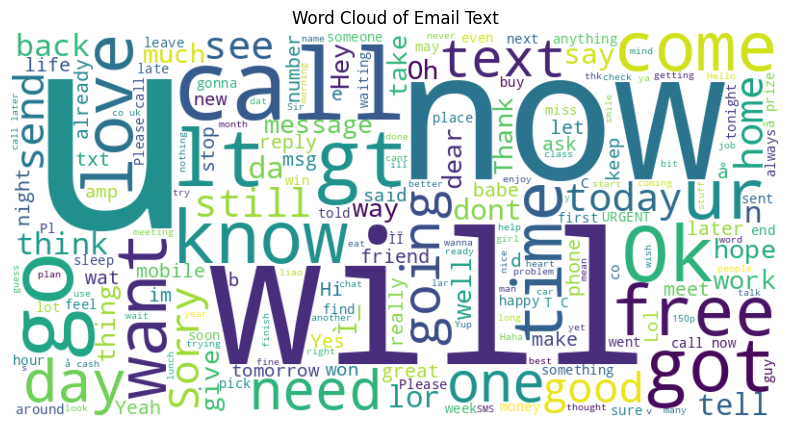

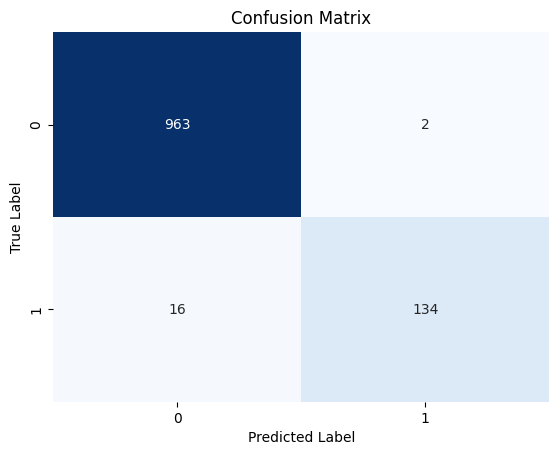

In [22]:

# Display the most important features
feature_names = vectorizer.get_feature_names_out()
feature_log_probabilities = classifier.feature_log_prob_[0]
feature_df = pd.DataFrame({'Feature': feature_names, 'Log Probability': feature_log_probabilities})
top_features = feature_df.nlargest(10, 'Log Probability')  # Display top 10 features

print("Top 10 Important Features:")
print(top_features)

# Generate a word cloud for visualizing frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Email Text')
plt.show()

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test_vectorized)), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()